* **Student**: Minhchau Dang
* **Email Address**: minhchau.dang@berkeley.edu
* **Course**: 2016-0111 DATASCI W261: Machine Learning at Scale
* **Section**: Spring 2016, Section 2
* **Assignment**: Homework 10, Week 10
* **Submission Date**: March 29, 2016

This notebook requires some nbextensions.

* [ruler](https://github.com/ipython-contrib/IPython-notebook-extensions/tree/master/nbextensions/usability/ruler) highlights a maximum line number so that you can avoid writing code that exceeds that character count
* [toc2](https://github.com/ipython-contrib/IPython-notebook-extensions/tree/master/nbextensions/usability/toc2) provides a button to create a floating table of contents
* [toggle_all_line_numbers](https://github.com/ipython-contrib/IPython-notebook-extensions/tree/master/nbextensions/usability/toggle_all_line_numbers) provides a button to see line numbers for all code cells
* [autosaveclasses](https://github.com/holatuwol/jupyter-magic/tree/master/nbextensions/autosaveclasses.js) avoids usage of `%%writefile` (cells with a class definition are saved to disk when run)

In [1]:
%%javascript
require(['base/js/utils'], function(utils) {
    utils.load_extensions('usability/ruler/main');
    utils.load_extensions('usability/toc2/main');
    utils.load_extensions('usability/toggle_all_line_numbers/main');
    utils.load_extensions('autosaveclasses');
});

<IPython.core.display.Javascript object>

# Initialize Spark Context

In [3]:
import findspark
findspark.init()

IndexError: list index out of range

In [3]:
import pyspark
sc = pyspark.SparkContext(appName="hw10")

# HW 10.0: Short answer questions

> What is Apache Spark and how is it different to Apache Hadoop?

Like Apache Hadoop, Apache Spark is a distributed computing framework for handling big data problems.

Spark differs from Hadoop in that it is strictly focused on the computing aspect of distributed computing. As a result, Spark does not try to solve the problem of distributed storage and it does not attempt to solve distributed resource management, but rather builds on top of the pre-existing solutions.

> Fill in the blanks.

From [Learn Spark in a Day](http://www.learnr.pro/content/66198-1/12#1811984487:19445.931329847488):

Spark API consists of interfaces to develop applications based on it in Java, **Python, and Scala** languages. Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or **YARN** in a distributed manner.

> What is an RDD?

As noted in the Java documentation ([reference](https://spark.apache.org/docs/1.6.0/api/java/org/apache/spark/rdd/RDD.html)), RDD stands for Resilient Distributed Dataset. RDD represents an immutable, lazy-evaluated collection of tuples, where each tuple is often interpreted as keys and their corresponding values. This is similar to how one might interpret a line in Hadoop MapReduce or a row in a data frame, though RDDs are different from both in that they are lazy-evaluated and thus not necessarily materialized.

As RDDs are lazy-evaluated, they also contain information on how they were derived. This information takes the form of a directed graph called a lineage graph, which can be used during failure recovery.

> Show a fun example of creating one and bringing the first element back to the driver program.

In [4]:
# Let's pretend we have an array of elements

story = ['once', 'upon', 'a', 'time']

# We convert it into an RDD simply by using "parallelize"

story_rdd = sc.parallelize(story)

# We can retrieve the first element by asking for it with "first"

story_rdd.first()

'once'

> What is lazy evaluation and give an intuitive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation.

Lazy evaluation is the notion that you only perform work when a result is actually needed.

One example of lazy evaluation is if you are attempting to find 10 documents containing the word "spark" in a subset of the web graph consisting of a billion nodes. You might write the following Spark code which declares the web graph as an RDD, declare that you wish to `map` to associate each node with its actual task, `filter` the RDD for a document containing the word "spark", and `take` any 10 documents that match:

    web_graph_rdd.map(load_page_text).filter(has_text('spark')).take(10)

Without lazy evaluation (for example, if this was a Node.js array), the very first transformation attempts to load all text for all billion nodes in the web graph, and the very next transformation would then search all text on all billion nodes in the web graph to find the word "spark", and then you would wind up with only grabbing any 10 that matched.

With lazy evaluation, once 10 documents are found, all further computation is no longer necessary and computation ends, potentially processing only a few thousand pages and web graph nodes instead of a billion pages.

# HW 10.1

## HW 10.1.0

### Acquire word count test document

> In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document as a the example document to run an experiment. 

First, we need to acquire the homework document as an example document.

In [5]:
import os

input_file = 'MIDS-MLS-HW-10.txt'

if not os.path.isfile(input_file):
    !curl -Ls https://www.dropbox.com/s/0vnj77z74piklsy/MIDS-MLS-HW-10.txt > $input_file
    !hdfs dfs -copyFromLocal $input_file

### Execute word count against test document

> Report the following: provide a sorted list of tokens in decreasing order of frequency of occurence.

Next, we write a Spark program to perform the word count on the example document and store it in the desired output folder.

In [6]:
import operator
import re

# Construct an RDD for the word count

word_count_rdd = sc.textFile(input_file) \
    .flatMap(lambda x: re.findall('\w+', x)) \
    .map(lambda x: (x, 1)) \
    .reduceByKey(operator.add) \
    .sortBy(lambda x: (-1 * x[1], x[0]))

# Take all tuples
    
word_count_rdd.collect()

[(u'the', 46),
 (u'and', 24),
 (u'in', 18),
 (u'of', 17),
 (u'10', 15),
 (u'HW', 13),
 (u'a', 13),
 (u'data', 11),
 (u'for', 11),
 (u'code', 10),
 (u'clusters', 9),
 (u'to', 9),
 (u'KMeans', 8),
 (u'is', 8),
 (u'1', 7),
 (u'2', 7),
 (u'3', 7),
 (u'HW10', 7),
 (u'Using', 7),
 (u'on', 7),
 (u'this', 7),
 (u'with', 7),
 (u'your', 7),
 (u'X', 6),
 (u'com', 6),
 (u'https', 6),
 (u's', 6),
 (u'x', 6),
 (u'0', 5),
 (u'as', 5),
 (u'from', 5),
 (u'iterations', 5),
 (u'kmeans_data', 5),
 (u'point', 5),
 (u'regression', 5),
 (u'txt', 5),
 (u'6', 4),
 (u'Comment', 4),
 (u'Set', 4),
 (u'Spark', 4),
 (u'Squared', 4),
 (u'Sum', 4),
 (u'What', 4),
 (u'Within', 4),
 (u'dl', 4),
 (u'dropbox', 4),
 (u'each', 4),
 (u'example', 4),
 (u'following', 4),
 (u'linear', 4),
 (u'model', 4),
 (u'one', 4),
 (u'provided', 4),
 (u'set', 4),
 (u'using', 4),
 (u'words', 4),
 (u'www', 4),
 (u'100', 3),
 (u'Errors', 3),
 (u'NOTE', 3),
 (u'Please', 3),
 (u'after', 3),
 (u'an', 3),
 (u'available', 3),
 (u'count', 3),
 (u'd

## HW 10.1.1

### Add filter to original word-count code

> Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.

While we could modify the regular expression used to extract words so that it specifically looks for lowercase ASCII letters as the first character, we can also use `filter` in order to check if the first character for any matching word matches our new restriction.

In [7]:
import operator
import re
import string

# Construct an RDD for the word count

word_count_rdd = sc.textFile(input_file) \
    .flatMap(lambda x: re.findall('\w+', x)) \
    .filter(lambda x: x[0] in string.ascii_lowercase) \
    .map(lambda x: (x, 1)) \
    .reduceByKey(operator.add) \
    .sortBy(lambda x: (-1 * x[1], x[0]))

# Take all tuples
    
word_count_rdd.collect()

[(u'the', 46),
 (u'and', 24),
 (u'in', 18),
 (u'of', 17),
 (u'a', 13),
 (u'data', 11),
 (u'for', 11),
 (u'code', 10),
 (u'clusters', 9),
 (u'to', 9),
 (u'is', 8),
 (u'on', 7),
 (u'this', 7),
 (u'with', 7),
 (u'your', 7),
 (u'com', 6),
 (u'https', 6),
 (u's', 6),
 (u'x', 6),
 (u'as', 5),
 (u'from', 5),
 (u'iterations', 5),
 (u'kmeans_data', 5),
 (u'point', 5),
 (u'regression', 5),
 (u'txt', 5),
 (u'dl', 4),
 (u'dropbox', 4),
 (u'each', 4),
 (u'example', 4),
 (u'following', 4),
 (u'linear', 4),
 (u'model', 4),
 (u'one', 4),
 (u'provided', 4),
 (u'set', 4),
 (u'using', 4),
 (u'words', 4),
 (u'www', 4),
 (u'after', 3),
 (u'an', 3),
 (u'available', 3),
 (u'count', 3),
 (u'document', 3),
 (u'evaluation', 3),
 (u'findings', 3),
 (u'import', 3),
 (u'it', 3),
 (u'lambda', 3),
 (u'lazy', 3),
 (u'list', 3),
 (u'notebook', 3),
 (u'or', 3),
 (u'parsedData', 3),
 (u'plot', 3),
 (u'plots', 3),
 (u'report', 3),
 (u'results', 3),
 (u'sc', 3),
 (u'training', 3),
 (u'any', 2),
 (u'array', 2),
 (u'at', 2)

# HW 10.2: KMeans a la MLLib

## Explore sample data

> NOTE: kmeans_data.txt is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0

First we need to retrieve the data.

In [8]:
input_file = 'kmeans_data.txt'

if not os.path.isfile(input_file):
    !curl -Ls https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt > $input_file
    !hdfs dfs -copyFromLocal $input_file

Let's take a quick look at the data.

In [9]:
!head kmeans_data.txt

0.0 0.0 0.0
0.1 0.1 0.1
0.2 0.2 0.2
9.0 9.0 9.0
9.1 9.1 9.1
9.2 9.2 9.2


If we were to run a k-means algorithm with $k = 2$, it wound find the two centers at `(0.1, 0.1, 0.1)` and `(9.1, 9.1, 9.1)`.

## Run MLLib k-means on sample data

> Run this code snippet.

In [10]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
# NOTE  kmeans_data.txt is available here
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0
data = sc.textFile("kmeans_data.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10, initializationMode="random")

## Evaluate MLLib k-means clusters from sample data

> List the clusters that you find.

Cluster centers are available as an attribute on the model.

In [11]:
clusters.centers

[array([ 9.1,  9.1,  9.1]), array([ 0.1,  0.1,  0.1])]

> Compute the Within Set Sum of Squared Errors for the found clusters.

The provided code includes a snippet for computing the within-set sum of squared errors for the clusters. We'll simplify it by passing the error function directly rather than through a lambda function and use the add function from the `operator` module instead of declaring a lambda function.

In [12]:
import operator

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(error).reduce(operator.add)
print "Within Set Sum of Squared Error =", WSSSE

Within Set Sum of Squared Error = 0.692820323028


> Comment on your findings.

We see that it's chosen the two anticipated centers from the data set, and that the sum of squared error is straightforward to compute as an RDD.

# HW 10.3

## Generate random data

> Download the following KMeans notebook:

> https://www.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb

> Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided).

Use the provided code and change the size from 1000 to 100.

In [13]:
import numpy as np

size1 = size2 = size3 = 100

samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)

data = np.vstack([samples1,samples2,samples3])

# Randomize data
data = data[np.random.permutation(size1+size2+size3),]

Let's also make sure the data is available in Hadoop for some of the sample code.

In [14]:
np.savetxt('data.csv',data,delimiter = ',')

!hdfs dfs -rm -f -skipTrash data.csv
!hdfs dfs -copyFromLocal data.csv

Deleted data.csv


## Explore random data

> Plot the data.

Update the provided code to plot the data using a reusable function.

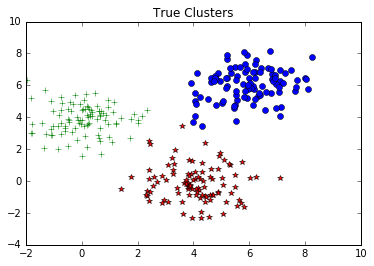

In [15]:
%matplotlib inline

import pylab

def plot_clusters(title, cluster1, cluster2, cluster3, means = None):
    pylab.plot(cluster1[:, 0], cluster1[:, 1], '*', color = 'red')
    pylab.plot(cluster2[:, 0], cluster2[:, 1], 'o', color = 'blue')
    pylab.plot(cluster3[:, 0], cluster3[:, 1], '+', color = 'green')
    
    if means is not None:
        pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
        pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
        pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    
    pylab.title(title)
    pylab.show()
    
    if means is not None:
        display(pandas.DataFrame(means, columns = ['x', 'y']))

plot_clusters('True Clusters', samples1, samples2, samples3)

## Run MLLib k-means on random data

> Then run MLlib's Kmean implementation on this data  and report your results as follows:

> * Plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
> * In each plot please report the Within Set Sum of Squared Errors for the found clusters. Comment on the progress of this measure as the KMEans algorithms runs for more iterations

First, we'll see what the clusters are after 1 iteration, 10 iterations, 20 iterations, and 100 iterations.

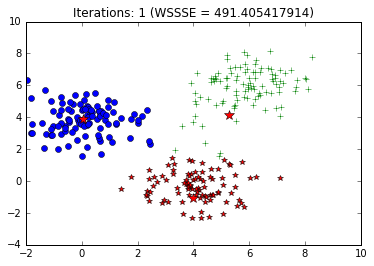

,x,y
0,4.005114,-1.054960
1,0.038093,3.879592
2,5.261067,4.143618


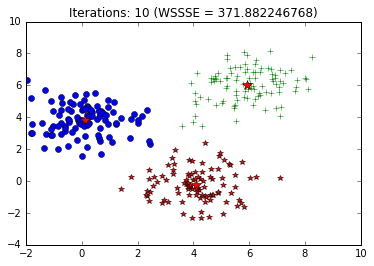

,x,y
0,4.087475,-0.228881
1,0.101434,3.838797
2,5.907331,6.024320


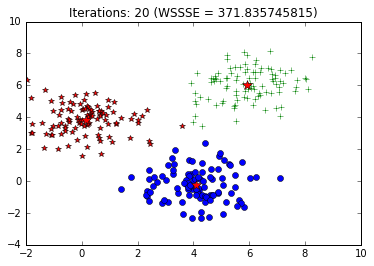

,x,y
0,0.135199,3.835222
1,4.087475,-0.228881
2,5.930612,6.049858


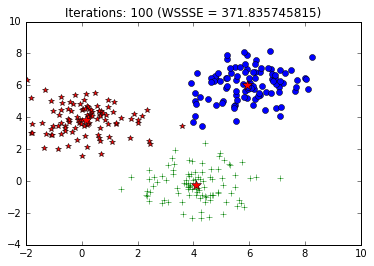

,x,y
0,0.135199,3.835222
1,5.930612,6.049858
2,4.087475,-0.228881


In [16]:
import functools
from IPython.display import display
import numpy
import operator
import pandas

# Create functions to filter the RDD

def in_cluster(cluster_id, point):
    return clusters.predict(point) == cluster_id

def get_cluster(cluster_id):
    in_my_cluster = functools.partial(in_cluster, cluster_id)
    return numpy.array(data_rdd.filter(in_my_cluster).collect())

# Run the iterations

data_rdd = sc.parallelize(data)

for i in [1, 10, 20, 100]:
    clusters = KMeans.train(data_rdd, 3, maxIterations=i, initializationMode='random')
    WSSSE = data_rdd.map(error).reduce(operator.add)

    plot_clusters(
        'Iterations: ' + str(i) + ' (WSSSE = ' + str(WSSSE) + ')',
        get_cluster(0), get_cluster(1), get_cluster(2), clusters.centers)

## Evaluate MLLib k-means clusters from random data

Depending on which random point we start with, we may wind up with the correct clusters right at the start or we may be slightly off. More iterations ultimately stabilizes the Within Set Sum of Squared Errors to the values we find for the true clusters.

# HW 10.4

## Run home-grown k-means on random data

> Using the KMeans code (homegrown code) provided repeat the experiments in HW10.3.

Below is the homegrown code from the provided notebook.

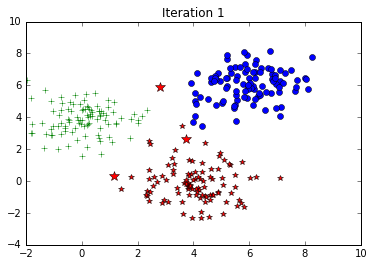

,x,y
0,1.157413,0.336773
1,3.751103,2.651675
2,2.801927,5.904107


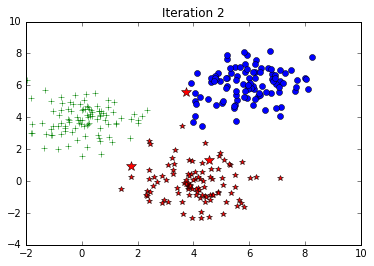

,x,y
0,1.758122,0.938206
1,4.544708,1.317371
2,3.728683,5.592289


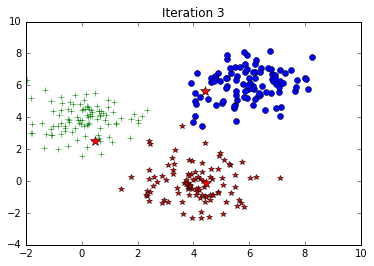

,x,y
0,0.464404,2.539969
1,4.439559,-0.154440
2,4.421927,5.665869


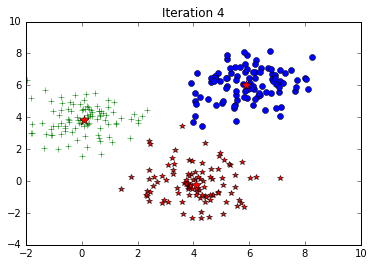

,x,y
0,0.095591,3.797765
1,4.111723,-0.233883
2,5.872511,6.008753


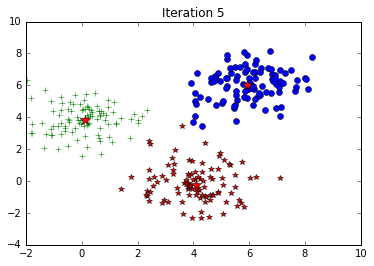

,x,y
0,0.101434,3.838797
1,4.087475,-0.228881
2,5.907331,6.024320


In [17]:
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("data.csv").cache()

for i in range(10):  
    res = D.map(nearest_centroid).reduceByKey(np.add).collect()
    res = sorted(res, key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    if np.sum(np.absolute(centroids_new-centroids))<0.01:
        break

    centroids = centroids_new
    plot_clusters('Iteration ' + str(i + 1), samples1, samples2, samples3, centroids)

## Evaluate home-grown k-means clusters from random data

> Comment on any differences between the results in HW10.3 and HW10.4. Explain.

First, revisit the results from HW 10.3 and 10.4.

In [18]:
display(pandas.DataFrame(clusters.centers, columns = ['x', 'y']))
display(pandas.DataFrame(centroids, columns = ['x', 'y']))

,x,y
0,0.135199,3.835222
1,5.930612,6.049858
2,4.087475,-0.228881


,x,y
0,0.101434,3.838797
1,4.087475,-0.228881
2,5.907331,6.024320


The centroids are very similar, but if we re-run the algorithm several times, there can be a slight difference because of the randomized initialization for the initial centers in the Spark example. This is because the k-means algorithm is essentially minimizing the Within Set Sum of Squared Errors, but the function is not necessarily convex.

If both the homegrown solution and the Spark solution were to use similar initial centers, chances are the resulting clusters would be identical. In testing, running the built-in k-means training algorithm did often converge to the same centers.

# HW 10.5 (OPTIONAL)

## Run weighted k-means on random data

> Using the KMeans code provided modify it to do a weighted KMeans and repeat the experiements in HW10.3.

> NOTE: Weight each example as follows using the inverse vector length (Euclidean norm):

> $weight(x) = \Large{\frac{1}{\lVert x \rVert}}$

> where $\lVert x \rVert = \sqrt{x \cdot x} = \sqrt{x_1^2 + x_2^2}$

> Here $x$ is vector made up of $x_1$ and $x_2$.

This is essentially identical to the original, but we add an additional `map` step that converts the unweighted point into a weighted point.

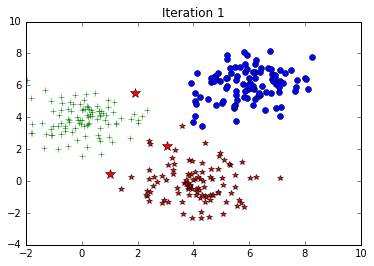

,x,y
0,0.998337,0.456937
1,3.041399,2.179363
2,1.895198,5.520879


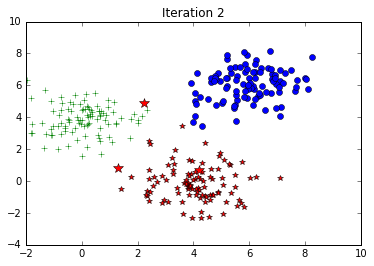

,x,y
0,1.306932,0.792014
1,4.209057,0.677781
2,2.219993,4.914950


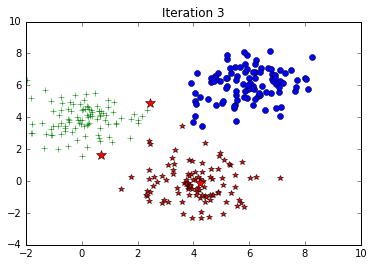

,x,y
0,0.679977,1.603153
1,4.240160,-0.115584
2,2.458926,4.906040


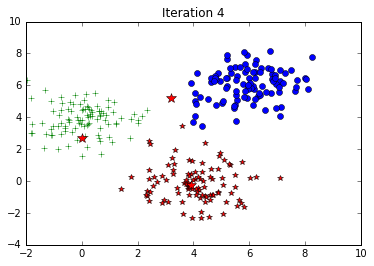

,x,y
0,-0.004247,2.729104
1,3.930989,-0.242673
2,3.210248,5.190894


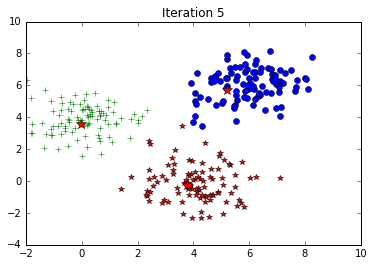

,x,y
0,-0.028589,3.547227
1,3.789782,-0.222206
2,5.220993,5.687007


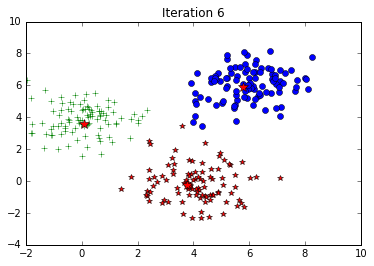

,x,y
0,0.090574,3.603314
1,3.789782,-0.222206
2,5.777480,5.896972


In [19]:
from numpy.linalg import norm

def weighted_point(value):
    cluster_id = value[0]

    point = value[1][0]
    new_weight = 1.0 / norm(point)

    return cluster_id, (point * new_weight, new_weight)

# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("data.csv").cache()

for i in range(10):
    res = D.map(nearest_centroid).map(weighted_point).reduceByKey(np.add).collect()
    res = sorted(res, key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    if np.sum(np.absolute(centroids_new-centroids))<0.01:
        break

    centroids = centroids_new
    plot_clusters('Iteration ' + str(i + 1), samples1, samples2, samples3, centroids)

## Evaluate weighted k-means clusters from random data

> Comment on any differences between the results in HW10.3 and HW10.5. Explain.

First, revisit the results from HW 10.3 and 10.5.

In [20]:
display(pandas.DataFrame(clusters.centers, columns = ['x', 'y']))
display(pandas.DataFrame(centroids, columns = ['x', 'y']))

,x,y
0,0.135199,3.835222
1,5.930612,6.049858
2,4.087475,-0.228881


,x,y
0,0.090574,3.603314
1,3.789782,-0.222206
2,5.777480,5.896972


The centroids are very similar, so it's likely that the small differences are due to a combination of the randomization in the MLLib algorithm and the weighting of the points for the clustering algorithm.

# HW 10.6: Linear Regression (OPTIONAL)

## HW 10.6.1

### Generate regression data

> Using the following linear regression notebook:

> https://www.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb

> Generate 2 sets of data with 100 data points using the data generation code provided and plot each in separate plots. Call one the training set and the other the testing set.

Here we have the code from the notebook responsible for generating data.

In [21]:
import numpy as np
import csv

def data_generate(fileName, w=[0,0], size=100):
    np.random.seed(0)
    x = np.random.uniform(-4, 4, size)
    noise = np.random.normal(0, 2, size)
    y = (x * w[0] + w[1] + noise)
    data = zip(y, x)
    with open(fileName,'wb') as f:
        writer = csv.writer(f)
        for row in data:
            writer.writerow(row)
    return True

Here we have the code from the notebook responsible for plotting the data.

In [22]:
import matplotlib.pyplot as plt

def dataPlot(file, w):
    with open(file, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            plt.plot(float(row[1]), float(row[0]),'o'+'r')
    plt.xlabel("x")
    plt.ylabel("y")
    x = [-4, 4]
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x,y, linewidth=2.0)
    plt.grid()
    plt.show()

We can now use it in order to create our data sets and plot the data.

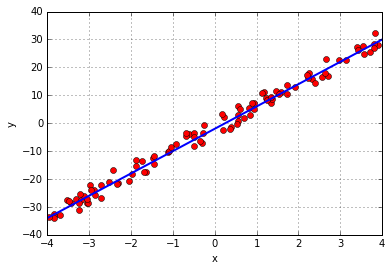

Deleted train.csv


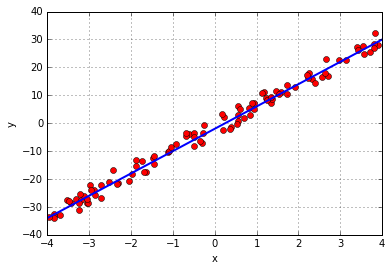

Deleted test.csv


In [23]:
w = [8,-2]

data_generate('train.csv', w, 100)
dataPlot('train.csv', w)

!hdfs dfs -rm -f -skipTrash train.csv
!hdfs dfs -copyFromLocal train.csv

data_generate('test.csv', w, 100)
dataPlot('test.csv', w)

!hdfs dfs -rm -f -skipTrash test.csv
!hdfs dfs -copyFromLocal test.csv

> Using MLLib's LinearRegressionWithSGD train up a linear regression model with the training dataset and evaluate with the testing set. What a good number of iterations for training the linear regression model? Justify with plots and words.

In [31]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel

# Point parsing from http://spark.apache.org/docs/latest/mllib-linear-methods.html

def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[0], values[1:])

train_rdd = sc.textFile('train.csv').map(parsePoint)
model = LinearRegressionWithSGD.train(train_rdd, iterations = 2, intercept = True)

KeyboardInterrupt: 

<span style="color: crimson; font-size: 3em; font-weight: bold">TODO</span>

## HW 10.6.2

> In the notebook provide, in the cell labeled "Gradient descent (regularization)", fill in the blanks and get this code to work for LASS0 and RIDGE linear regression.

<span style="color: crimson; font-size: 3em; font-weight: bold">TODO</span>

> Using the data from 10.6.1 tune the hyper parameters of your LASS0 and RIDGE regression. Report your findings with words and plots.

<span style="color: crimson; font-size: 3em; font-weight: bold">TODO</span>